=== Evaluasi Model Random Forest ===
Akurasi: 0.90
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



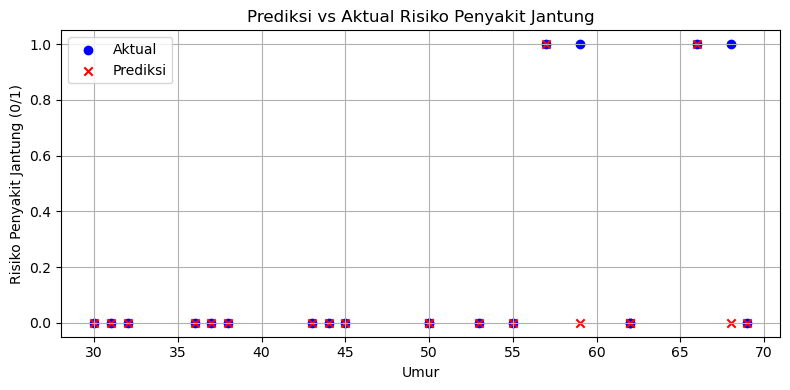

Model berhasil disimpan sebagai 'modelRF_prediksi_penyakit_jantung.pkl'


In [1]:
# ================================
# Prediksi Penyakit Jantung - Random Forest
# ================================

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Buat folder untuk menyimpan model
os.makedirs("models", exist_ok=True)

# ==========================
# 1. Membuat Dataset Simulasi
# ==========================
np.random.seed(42)

# Data input (100 sampel)
umur = np.random.randint(30, 70, 100).reshape(-1, 1)
tekanan_darah = np.random.randint(100, 180, 100).reshape(-1, 1)
kolesterol = np.random.randint(150, 300, 100).reshape(-1, 1)
detak_jantung = np.random.randint(100, 180, 100).reshape(-1, 1)

# Target (0 = tidak berisiko, 1 = berisiko)
risiko = ((umur > 50) & (tekanan_darah > 140) & (kolesterol > 240)).astype(int).ravel()

# Gabungkan semua fitur
X = np.hstack((umur, tekanan_darah, kolesterol, detak_jantung))
Y = risiko

# ==========================
# 2. Split Data Train & Test
# ==========================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ==========================
# 3. Training Random Forest
# ==========================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# ==========================
# 4. Evaluasi Model
# ==========================
Y_pred = rf_model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)

print("=== Evaluasi Model Random Forest ===")
print(f"Akurasi: {acc:.2f}")
print(classification_report(Y_test, Y_pred))

# ==========================
# 5. Visualisasi Prediksi
# ==========================
plt.figure(figsize=(8, 4))
plt.scatter(X_test[:, 0], Y_test, color='blue', label='Aktual')
plt.scatter(X_test[:, 0], Y_pred, color='red', marker='x', label='Prediksi')
plt.xlabel('Umur')
plt.ylabel('Risiko Penyakit Jantung (0/1)')
plt.title('Prediksi vs Aktual Risiko Penyakit Jantung')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================
# 6. Simpan Model ke File
# ==========================
with open("models/modelRF_penyakit_jantung.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model berhasil disimpan sebagai 'modelRF_prediksi_penyakit_jantung.pkl'")
